In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns 
from datetime import date
import calendar

In [2]:
#ensuring same results each time i restart the notebook
np.random.seed(0)

In [3]:
td=ad=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',skiprows=1)
ad=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',skiprows=1)
cd=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/1440462824.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cd=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)


In [4]:
td['transaction_date'].describe()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/1178658489.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  td['transaction_date'].describe()


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [6]:
#drop names fields
cd.drop(columns=['first_name','last_name'],inplace=True)
cd.shape

(4000, 11)

In [7]:
cd.dropna(subset=['DOB',],inplace=True)
cd.drop(columns=['default'],inplace=True)

In [8]:
cd.shape

(3913, 10)

In [9]:
#remove deceased
cd=cd[cd['deceased_indicator']=='N']

In [10]:
cd.shape

(3911, 10)

In [11]:
#merge demographic and address data 
data=pd.merge(cd,ad, how='left')
data.shape

(3911, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3911 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3911 non-null   int64         
 1   gender                               3911 non-null   object        
 2   past_3_years_bike_related_purchases  3911 non-null   int64         
 3   DOB                                  3911 non-null   datetime64[ns]
 4   job_title                            3414 non-null   object        
 5   job_industry_category                3255 non-null   object        
 6   wealth_segment                       3911 non-null   object        
 7   deceased_indicator                   3911 non-null   object        
 8   owns_car                             3911 non-null   object        
 9   tenure                               3911 non-null   float64       
 10  address     

In [13]:
data.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [14]:
data.drop(columns=['address','country'], inplace=True)
data.shape

(3911, 13)

In [15]:
#mitigating inconsistencies in gender field
chg=['Femal','F']
m=['M']
u=['U']
data['gender'].replace(to_replace=chg,value='Female', inplace=True)
data['gender'].replace(to_replace=m,value='Male', inplace=True)
data['gender'].replace(to_replace=u,value='Unspecified', inplace=True)
data['gender'].value_counts()
data['gender'].value_counts()

Female         2038
Male           1872
Unspecified       1
Name: gender, dtype: int64

In [16]:
data.dropna(subset=['state'],inplace=True)

In [17]:
data.shape

(3907, 13)

In [18]:
data['DOB'].describe()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/3780420313.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['DOB'].describe()


count                    3907
unique                   3442
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [19]:
#replacing 1843 with 1943
data['DOB'].replace('1843-12-21 00:00:00','1943-12-21 00:00:00', inplace=True)

In [20]:
#creating age column
data['YOB']=pd.DatetimeIndex(data['DOB']).year
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,YOB
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0,1953
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0,1980
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0,1961
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0,1977
5,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,3216.0,VIC,9.0,1966


In [21]:
data['AGE']=2018-data['YOB']
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,YOB,AGE
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0,1953,65
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0,1980,38
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0,1961,57
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0,1977,41
5,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,3216.0,VIC,9.0,1966,52


In [22]:
data.drop(columns=['YOB'],inplace=True)

In [23]:
data['AGE'].describe()

count    3907.000000
mean       40.934988
std        12.621103
min        16.000000
25%        31.000000
50%        41.000000
75%        50.000000
max        87.000000
Name: AGE, dtype: float64

In [24]:
#creating groups by binning
bins=np.linspace(min(data['AGE']),max(data['AGE']),5)

In [25]:
bins

array([16.  , 33.75, 51.5 , 69.25, 87.  ])

In [26]:
group_names=['youths','middle age','seniors','elderly']
data['Age_bin']=pd.cut(data['AGE'],bins,labels=group_names,include_lowest=True)
data['Age_bin'].value_counts() 

middle age    1823
youths        1188
seniors        890
elderly          6
Name: Age_bin, dtype: int64

In [27]:
data['state'].value_counts()

NSW                2003
VIC                 918
QLD                 822
New South Wales      85
Victoria             79
Name: state, dtype: int64

In [28]:
#fixing inconsistencies in state values
data.replace(to_replace=['New South Wales'],value='NSW', inplace=True)
data.replace(to_replace=['Victoria'],value='VIC', inplace=True)
data['state'].value_counts()

NSW    2088
VIC     997
QLD     822
Name: state, dtype: int64

In [29]:
td.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [30]:
td['transaction_date'].describe()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/1178658489.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  td['transaction_date'].describe()


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [31]:
td.shape

(20000, 13)

In [32]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [33]:
td.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [34]:
#drop cancelled transaction data
td=td[td['order_status']=='Approved']

In [35]:
td.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,19821,19625,19625,19625,19625
unique,1,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4211,14048,13701,12876


In [36]:
td.drop(columns='product_first_sold_date', inplace=True)

In [37]:
td.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,19821.000000,19821.000000,19821.000000,19467.000000,19821.000000,19625.000000
mean,10006.222794,45.343878,1738.485899,0.499923,1107.623061,555.821210
std,5774.215708,30.760892,1011.981306,0.500013,583.021720,405.977243
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000
25%,5003.000000,18.000000,858.000000,0.000000,575.270000,215.140000
50%,10008.000000,44.000000,1735.000000,0.000000,1163.890000,507.580000
75%,15010.000000,72.000000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000


In [38]:
td['profit']=td['list_price']-td['standard_cost']

In [39]:
td.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,19821,19625,19625,19625,19625
unique,1,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4211,14048,13701,12876


In [40]:
td['brand'].value_counts()

Solex             4211
Giant Bicycles    3283
WeareA2B          3265
OHM Cycles        3016
Trek Bicycles     2965
Norco Bicycles    2885
Name: brand, dtype: int64

In [41]:
len(td['transaction_id'].unique())

19821

In [42]:
td=td[td['customer_id']<=3500]
td.shape

(19818, 13)

In [43]:
#MODEL DEVELOPMENT
#DATA TO BE USED FOR BEHAVIORAL CLUSTERING 
td.rename(columns={'profit':'value'}, inplace=True)

In [44]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19818 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19818 non-null  int64         
 1   product_id        19818 non-null  int64         
 2   customer_id       19818 non-null  int64         
 3   transaction_date  19818 non-null  datetime64[ns]
 4   online_order      19464 non-null  float64       
 5   order_status      19818 non-null  object        
 6   brand             19622 non-null  object        
 7   product_line      19622 non-null  object        
 8   product_class     19622 non-null  object        
 9   product_size      19622 non-null  object        
 10  list_price        19818 non-null  float64       
 11  standard_cost     19622 non-null  float64       
 12  value             19622 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [45]:

df=td.groupby(by='customer_id').agg({'value':sum, 'customer_id': lambda x: x.value_counts() })
df

,value,customer_id
customer_id,,
1,3018.09,11
2,2226.26,3
3,3362.81,8
4,220.57,2
5,2394.94,6
...,...,...
3496,2045.84,4
3497,1648.32,3
3498,3147.33,6


In [46]:
df.rename(columns={'customer_id':'transactions'}, inplace=True)
df

,value,transactions
customer_id,,
1,3018.09,11
2,2226.26,3
3,3362.81,8
4,220.57,2
5,2394.94,6
...,...,...
3496,2045.84,4
3497,1648.32,3
3498,3147.33,6


In [47]:
df['value_per_transaction']=df['value']/df['transactions']
df

,value,transactions,value_per_transaction
customer_id,,,
1,3018.09,11,274.371818
2,2226.26,3,742.086667
3,3362.81,8,420.351250
4,220.57,2,110.285000
5,2394.94,6,399.156667
...,...,...,...
3496,2045.84,4,511.460000
3497,1648.32,3,549.440000
3498,3147.33,6,524.555000


In [48]:
df.sort_values(by='value',ascending=False, inplace=True)

In [49]:
td.shape

(19818, 13)

In [50]:
df.head()

,value,transactions,value_per_transaction
customer_id,,,
941,11668.95,10,1166.895000
2637,11222.65,11,1020.240909
1460,10787.60,8,1348.450000
1558,10640.30,9,1182.255556
729,10497.78,10,1049.778000


In [51]:
data.shape

(3907, 15)

In [52]:
#Standardizing the data

# Normalize data

# Rank the data
df_rank = df.rank()

# Let us normalize the data to center around 
# the mean and have a mean of 0 and a standard deviation of 1
df_normalized = (df_rank - df_rank.mean()) / df_rank.std()
df2=df_normalized
df2.describe()

,value,transactions,value_per_transaction
count,3.492000e+03,3492.000000,3.492000e+03
mean,6.511274e-17,0.000000,-6.511274e-17
std,1.000000e+00,1.000000,1.000000e+00
min,-1.731307e+00,-1.722491,-1.731307e+00
25%,-8.656535e-01,-0.865998,-8.656535e-01
50%,0.000000e+00,0.279661,0.000000e+00
75%,8.656535e-01,0.797459,8.656535e-01
max,1.731307e+00,1.745505,1.731307e+00


In [53]:
df2.head()

,value,transactions,value_per_transaction
customer_id,,,
941,1.731307,1.593417,1.686673
2637,1.730315,1.673963,1.616250
1460,1.729323,1.185682,1.716429
1558,1.728331,1.440329,1.691632
729,1.727339,1.593417,1.640055


In [54]:
cc=list(df2.columns)
cc

['value', 'transactions', 'value_per_transaction']

In [55]:
#CLUSTERING BEGINS BY DETERMINING THE RIGHT No. OF CLUSTERS
# Import packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics 
from scipy.spatial.distance import cdist

# Calculate Silhouette coefficients for different k
for n_cluster in [2, 3, 4, 5, 6, 7, 8,9,10]:
    kmeans = KMeans(n_clusters=n_cluster,
                    max_iter=400,
                    n_init=20).fit(df2[cc])
    silhouette_avg = silhouette_score(df2[cc],
                                      kmeans.labels_) 
    print('Silhouette coefficient for %i clusters: %0.3f' % (n_cluster, silhouette_avg))

Silhouette coefficient for 2 clusters: 0.411
Silhouette coefficient for 3 clusters: 0.407
Silhouette coefficient for 4 clusters: 0.409
Silhouette coefficient for 5 clusters: 0.389
Silhouette coefficient for 6 clusters: 0.372
Silhouette coefficient for 7 clusters: 0.387
Silhouette coefficient for 8 clusters: 0.385
Silhouette coefficient for 9 clusters: 0.382
Silhouette coefficient for 10 clusters: 0.380


C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/884324244.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-',  linewidth=2.5, color='dodgerblue')


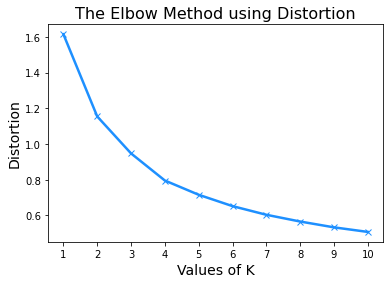

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/884324244.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertias, 'bx-', linewidth=2.5, color='dodgerblue')


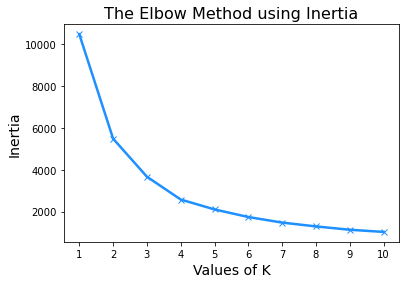

In [56]:
# Let's apply Elbow method to define the optimal number of clusters
# Calculate inertias and distortions for customers dataset
distortions = [] 
inertias = []
K=range(1, 11)

for k in K: 
    kmeanModel = KMeans(n_clusters=k,
                        max_iter=400,
                        n_init=20).fit(df2[cc]) 
    kmeanModel.fit(df2[cc])
    distortions.append(sum(np.min(cdist(df2[cc],
                                        kmeanModel.cluster_centers_,
                                        'euclidean'),axis=1)) / df2[cc].shape[0]) 
    inertias.append(kmeanModel.inertia_)
    
 # Plot distortions
plt.plot(K, distortions, 'bx-',  linewidth=2.5, color='dodgerblue') 
plt.xlabel('Values of K', fontsize=14) 
plt.ylabel('Distortion', fontsize=14) 
plt.title('The Elbow Method using Distortion', fontsize=16) 
plt.xticks(np.arange(1, 11))
plt.show()

# Plot inertias
plt.plot(K, inertias, 'bx-', linewidth=2.5, color='dodgerblue') 
plt.xlabel('Values of K', fontsize=14) 
plt.ylabel('Inertia', fontsize=14) 
plt.title('The Elbow Method using Inertia', fontsize=16) 
plt.xticks(np.arange(1, 11))
plt.show()


In [57]:
#Looking at the Elbow curves and Silhouette coefficients, I chose the number of clusters=5 because 
#the Silhouette coefficient is relatively high plus inertia and distortion do not change significantly 
#with increasing the number of clusters.

In [58]:
#BUILDING THE k-means CLUSTERING MODEL
# Build k-means clustering model
kmeans = KMeans(n_clusters=5,
                max_iter=400,
                n_init=20).fit(df2[cc])

# Get centres of the clusters
df_cluster_centres = pd.DataFrame(kmeans,index=df2.index  ,columns=cc)
df_cluster_centres['Cluster'] = df_cluster_centres.index

# Mark each customer with its cluster
df_five_clusters = df2[cc].copy(deep=True)
df_five_clusters['Cluster'] = kmeans.labels_

In [59]:
df_five_clusters.head()

,value,transactions,value_per_transaction,Cluster
customer_id,,,,
941,1.731307,1.593417,1.686673,3
2637,1.730315,1.673963,1.616250,3
1460,1.729323,1.185682,1.716429,3
1558,1.728331,1.440329,1.691632,3
729,1.727339,1.593417,1.640055,3


In [60]:
df_five_clusters.shape

(3492, 4)

In [61]:
df_five_clusters['Cluster'].value_counts()

1    775
0    732
3    718
2    656
4    611
Name: Cluster, dtype: int64

In [62]:
df_five_clusters.groupby(by='Cluster').agg({'value':sum,'transactions':sum,'value_per_transaction':sum})

,value,transactions,value_per_transaction
Cluster,,,
0,-55.450423,574.202963,-556.224628
1,-992.916177,-686.241443,-897.172573
2,-332.293393,-633.976364,341.638781
3,915.344104,867.026488,425.190334
4,465.315889,-121.011644,686.568086


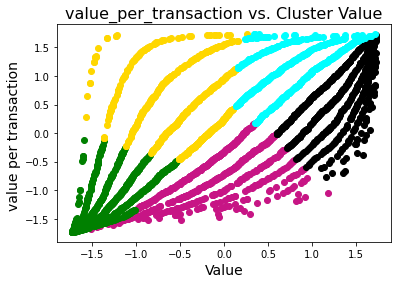

In [63]:
#Value per transaction vs value
plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 0]['value'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 0]['value_per_transaction'],
            c='mediumvioletred')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 1]['value'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 1]['value_per_transaction'],
            c='green')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 2]['value'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 2]['value_per_transaction'],
            c='gold')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 3]['value'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 3]['value_per_transaction'],
            c='black')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 4]['value'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 4]['value_per_transaction'],
            c='cyan')

plt.title('value_per_transaction vs. Cluster Value', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('value per transaction ', fontsize=14);


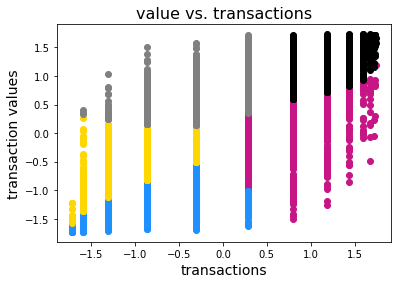

In [64]:
#VIZUALISING THE SEGMENTS
# Visulaize value and transaction count

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 0]['transactions'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 0]['value'],
            c='mediumvioletred')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 1]['transactions'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 1]['value'],
            c='dodgerblue')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 2]['transactions'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 2]['value'],
            c='gold')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 3]['transactions'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 3]['value'],
            c='black')

plt.scatter(df_five_clusters.loc[df_five_clusters['Cluster'] == 4]['transactions'], 
            df_five_clusters.loc[df_five_clusters['Cluster'] == 4]['value'],
            c='grey')

plt.title('value vs. transactions', fontsize=16)
plt.xlabel('transactions', fontsize=14)
plt.ylabel('transaction values', fontsize=14);

In [65]:
#observing the top segment
#Let us look at the most popular purchases by the high-value segment

#obtain dataframe of high value customers from df_four_clusters

high_value =df_five_clusters[df_five_clusters['Cluster'].isin([3]) ]
high_value.tail()

,value,transactions,value_per_transaction,Cluster
customer_id,,,,
3104,0.608511,0.797459,-0.002480,3
1728,0.606528,0.797459,-0.004463,3
2703,0.602560,0.797459,-0.009423,3
1577,0.601568,0.797459,-0.012398,3
3077,0.599585,0.797459,-0.018350,3


In [66]:
high_value.shape

(718, 4)

In [67]:
#combining the 2 classes to get the top 1000. vips and secd
high_value['transactions'].describe()

count    718.000000
mean       1.207558
std        0.329581
min        0.797459
25%        0.797459
50%        1.185682
75%        1.440329
max        1.745505
Name: transactions, dtype: float64

In [68]:
#getting data of high value customers from demographic data using the customer_id
#obtaining their demographic data
seg3=data[data['customer_id'].isin(high_value.index)]
seg3.shape

(695, 15)

In [69]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19818 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19818 non-null  int64         
 1   product_id        19818 non-null  int64         
 2   customer_id       19818 non-null  int64         
 3   transaction_date  19818 non-null  datetime64[ns]
 4   online_order      19464 non-null  float64       
 5   order_status      19818 non-null  object        
 6   brand             19622 non-null  object        
 7   product_line      19622 non-null  object        
 8   product_class     19622 non-null  object        
 9   product_size      19622 non-null  object        
 10  list_price        19818 non-null  float64       
 11  standard_cost     19622 non-null  float64       
 12  value             19622 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [70]:
seg3['customer_id'].duplicated().value_counts()

False    695
Name: customer_id, dtype: int64

In [71]:
seg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 7 to 3421
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          695 non-null    int64         
 1   gender                               695 non-null    object        
 2   past_3_years_bike_related_purchases  695 non-null    int64         
 3   DOB                                  695 non-null    datetime64[ns]
 4   job_title                            623 non-null    object        
 5   job_industry_category                582 non-null    object        
 6   wealth_segment                       695 non-null    object        
 7   deceased_indicator                   695 non-null    object        
 8   owns_car                             695 non-null    object        
 9   tenure                               695 non-null    float64       
 10  postcode     

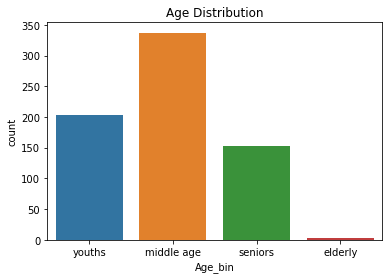

In [72]:
sns.countplot(x=seg3['Age_bin'])
plt.title('Age Distribution')
plt.savefig('Age_Groups.jpg')

In [73]:
bins

array([16.  , 33.75, 51.5 , 69.25, 87.  ])

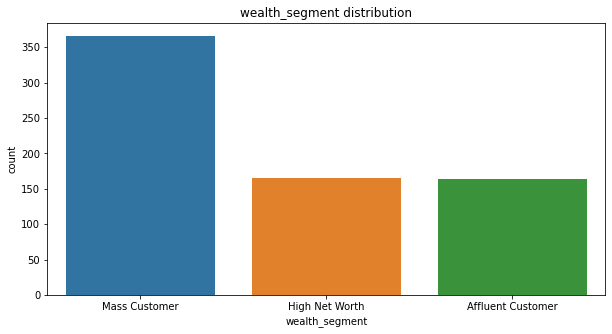

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(x=seg3['wealth_segment'])
plt.title('wealth_segment distribution')
plt.savefig('wealth_segment.jpg')

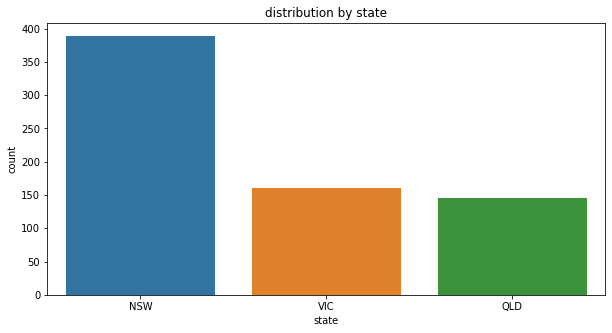

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x=seg3['state'])
plt.title('distribution by state')
plt.savefig('state.jpg')

In [76]:
seg3['job_industry_category'].value_counts()

Financial Services    147
Manufacturing         134
Health                110
Retail                 69
Property               47
Entertainment          26
IT                     21
Argiculture            17
Telecommunications     11
Name: job_industry_category, dtype: int64

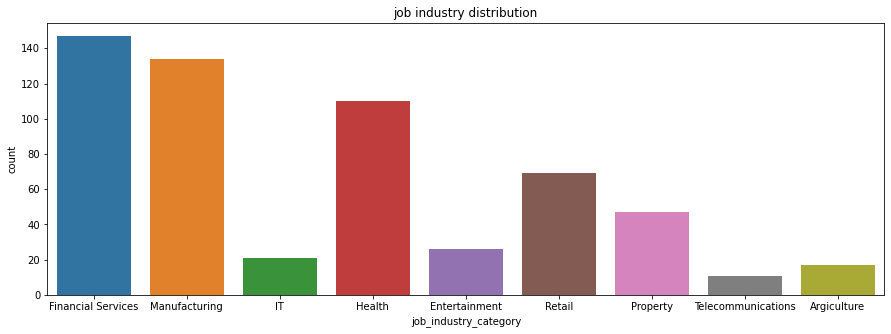

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x=seg3['job_industry_category'])
plt.title('job industry distribution')
plt.savefig('job_industry.jpg')

In [78]:
seg3['owns_car'].value_counts()

No     356
Yes    339
Name: owns_car, dtype: int64

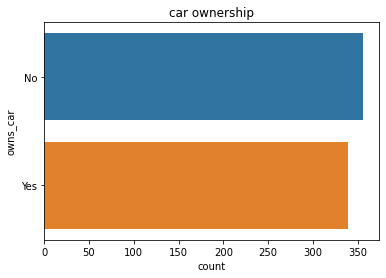

In [79]:
sns.countplot(y=seg3['owns_car'])
plt.title('car ownership')
plt.savefig('owns_car.jpg')

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


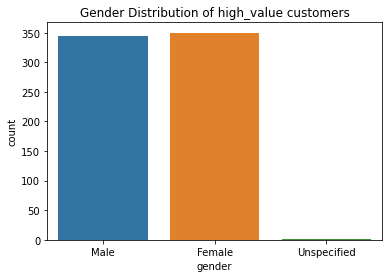

In [139]:
sns.countplot(seg3['gender'])
plt.title('Gender Distribution of high_value customers')
plt.savefig('gender.jpg')

In [80]:
seg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 7 to 3421
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          695 non-null    int64         
 1   gender                               695 non-null    object        
 2   past_3_years_bike_related_purchases  695 non-null    int64         
 3   DOB                                  695 non-null    datetime64[ns]
 4   job_title                            623 non-null    object        
 5   job_industry_category                582 non-null    object        
 6   wealth_segment                       695 non-null    object        
 7   deceased_indicator                   695 non-null    object        
 8   owns_car                             695 non-null    object        
 9   tenure                               695 non-null    float64       
 10  postcode     

In [81]:
#tenure distribution 
tenure_bins=np.linspace(min(seg3['tenure']), max(seg3['tenure']),5)
print(tenure_bins)
gp_names=['1-6','7-11','12-16','17-22']
seg3['tenure_binned']=pd.cut(seg3['tenure'],tenure_bins,labels=gp_names,include_lowest=True)
seg3['tenure_binned'].value_counts() 


[ 1.    6.25 11.5  16.75 22.  ]


C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/1665248187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg3['tenure_binned']=pd.cut(seg3['tenure'],tenure_bins,labels=gp_names,include_lowest=True)


12-16    198
1-6      181
7-11     169
17-22    147
Name: tenure_binned, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


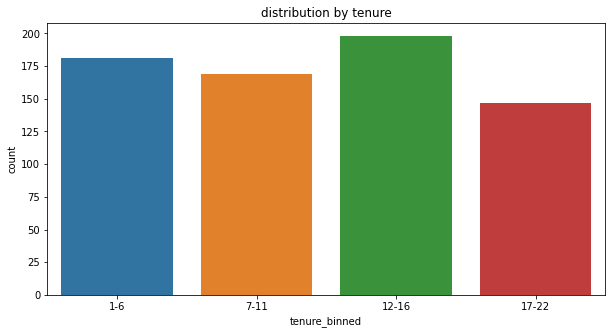

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(seg3['tenure_binned'])
plt.title('distribution by tenure')
plt.savefig('tenure.jpg')

In [83]:
seg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 7 to 3421
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          695 non-null    int64         
 1   gender                               695 non-null    object        
 2   past_3_years_bike_related_purchases  695 non-null    int64         
 3   DOB                                  695 non-null    datetime64[ns]
 4   job_title                            623 non-null    object        
 5   job_industry_category                582 non-null    object        
 6   wealth_segment                       695 non-null    object        
 7   deceased_indicator                   695 non-null    object        
 8   owns_car                             695 non-null    object        
 9   tenure                               695 non-null    float64       
 10  postcode     

In [84]:
pv=seg3.groupby(by='property_valuation').agg({'property_valuation':lambda x: x.value_counts()})
pv

,property_valuation
property_valuation,
1.0,22
2.0,25
3.0,37
4.0,41
5.0,42
6.0,33
7.0,70
8.0,123
9.0,127


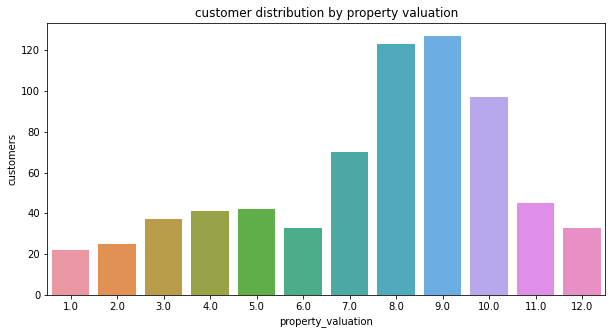

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x=pv.index,y=pv['property_valuation'])
plt.ylabel('customers')
plt.title('customer distribution by property valuation')
plt.savefig('property_valuation.jpg')

In [86]:
#OBTAINING TRANSACTION DATA FOR VIPS
seg3_td=td[td['customer_id'].isin(high_value.index)]
seg3_td.shape

(6089, 13)

In [87]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55


In [88]:
len(seg3_td['customer_id'].unique())

718

In [89]:
#top 10 busiest days
date=seg3_td.groupby('transaction_date').agg({'transaction_date':lambda x: x.value_counts()})
date

,transaction_date
transaction_date,
2017-01-01,9
2017-01-02,18
2017-01-03,15
2017-01-04,12
2017-01-05,24
...,...
2017-12-26,18
2017-12-27,10
2017-12-28,18


In [90]:
date.rename(columns={'transaction_date':'counts'}, inplace=True)
date

,counts
transaction_date,
2017-01-01,9
2017-01-02,18
2017-01-03,15
2017-01-04,12
2017-01-05,24
...,...
2017-12-26,18
2017-12-27,10
2017-12-28,18


In [91]:
date.sort_values(by='counts', ascending=False, inplace=True)
date

,counts
transaction_date,
2017-02-14,28
2017-08-18,28
2017-09-20,26
2017-10-16,26
2017-04-21,26
...,...
2017-05-19,8
2017-06-28,8
2017-04-03,7


In [92]:
#top 10 busiest days
date.head(20)

,counts
transaction_date,
2017-02-14,28
2017-08-18,28
2017-09-20,26
2017-10-16,26
2017-04-21,26
2017-01-31,26
2017-12-02,25
2017-12-01,25
2017-07-06,25


In [93]:
date.tail(10)

,counts
transaction_date,
2017-07-13,9
2017-01-01,9
2017-03-26,8
2017-01-12,8
2017-09-25,8
2017-05-19,8
2017-06-28,8
2017-04-03,7
2017-10-19,7


In [94]:
#creating a month column
seg3_td['month']=pd.DatetimeIndex(seg3_td['transaction_date']).month
seg3_td.head()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/1005701437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg3_td['month']=pd.DatetimeIndex(seg3_td['transaction_date']).month


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8


In [95]:
seg3_td['month'].value_counts()

10    546
11    537
8     530
5     515
12    513
7     509
4     506
9     504
3     498
2     495
6     475
1     461
Name: month, dtype: int64

In [96]:
months=seg3_td.groupby('month').agg({'month':lambda x: x.value_counts()})
months

,month
month,
1,461
2,495
3,498
4,506
5,515
6,475
7,509
8,530
9,504


In [97]:
months.rename(columns={'month':'counts'},inplace=True)
months.sort_values(by='counts', ascending=False, inplace=True)
months

,counts
month,
10,546
11,537
8,530
5,515
12,513
7,509
4,506
9,504
3,498


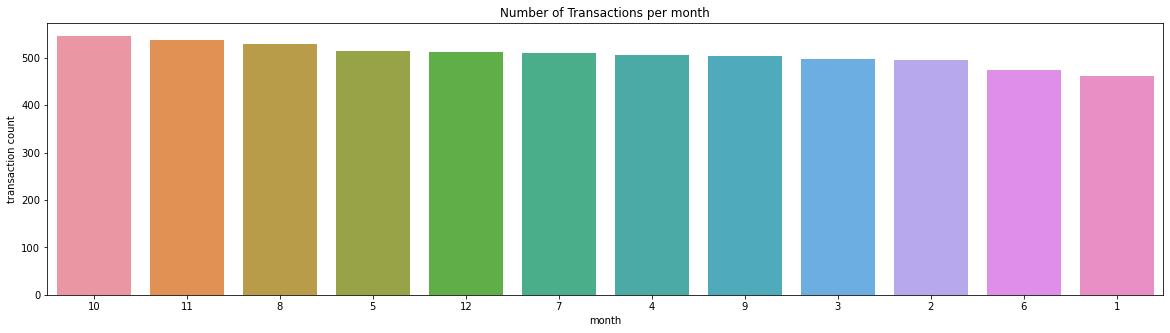

In [98]:
#transactions by month
plt.figure(figsize=(20,5))
sns.barplot(x=months.index, y=months['counts'], order=months.index)
plt.title('Number of Transactions per month')
plt.ylabel('transaction count')
plt.savefig('transactions_per_month.jpg')

In [99]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8


In [100]:
#top 10 most sold products 
products=seg3_td.groupby('product_id').agg({'product_id': lambda x:x.value_counts()})
products.rename(columns={'product_id':'counts'}, inplace=True)
products.sort_values(by='counts', inplace=True, ascending=False)
pdts=products.head(10)
pdts

,counts
product_id,
0,333
3,170
1,105
38,95
4,86
35,85
54,83
64,80
43,80


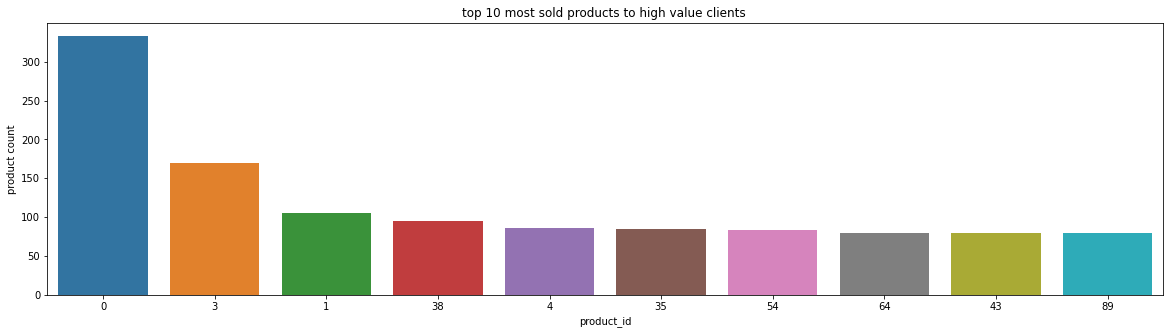

In [101]:
#top 10 most sold products to high value clients 
plt.figure(figsize=(20,5))
sns.barplot(x=pdts.index, y=pdts['counts'], order=pdts.index)
plt.title('top 10 most sold products to high value clients ')
plt.ylabel('product count')
plt.savefig('top_pdt_high_value.jpg')

In [102]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8


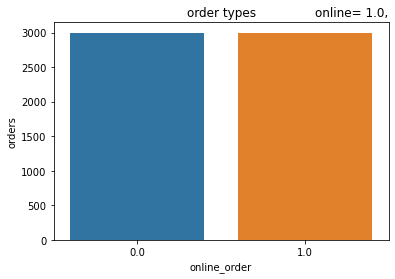

In [103]:
#how the segment orders
#order type distribution 
sns.countplot(x=seg3_td['online_order'])
plt.title('order types')
plt.ylabel('orders')
plt.title('online= 1.0,', loc='right')
plt.savefig('online_offline.jpg')

In [104]:
seg3_td['online_order'].value_counts()

1.0    2998
0.0    2990
Name: online_order, dtype: int64

In [105]:
#top brands
seg3_td['brand'].value_counts()

Solex             1305
WeareA2B          1051
Giant Bicycles     987
Trek Bicycles      948
OHM Cycles         919
Norco Bicycles     817
Name: brand, dtype: int64

In [106]:
brands=seg3_td.groupby(by='brand').agg({'brand': lambda x:x.value_counts()})
brands.rename(columns={'brand':'counts'}, inplace=True)
brands.sort_values(by='counts', ascending=False, inplace=True)
brands

,counts
brand,
Solex,1305
WeareA2B,1051
Giant Bicycles,987
Trek Bicycles,948
OHM Cycles,919
Norco Bicycles,817


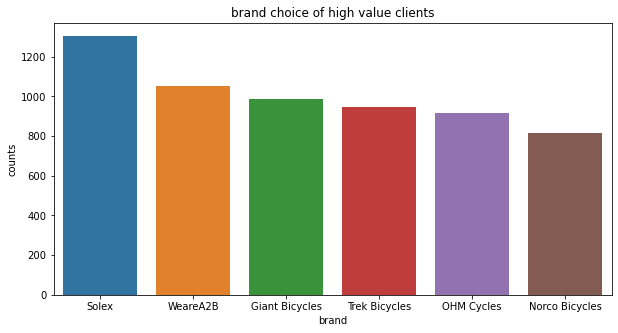

In [107]:
#brand choice of high value clients 
plt.figure(figsize=(10,5))
sns.barplot(x=brands.index, y=brands['counts'] )
plt.title('brand choice of high value clients')

plt.savefig('brand_hv.jpg')

In [108]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8


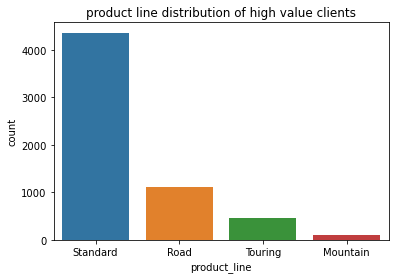

In [109]:
#product_line associate with high value customers
sns.countplot(x=seg3_td['product_line'])
plt.title('product line distribution of high value clients')

plt.savefig('pdt_line_hv.jpg')

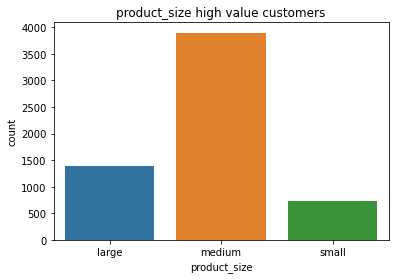

In [110]:
#product size high-value
sns.countplot(x=seg3_td['product_size'])
plt.title('product_size high value customers')

plt.savefig('pdt_siz_hv.jpg')

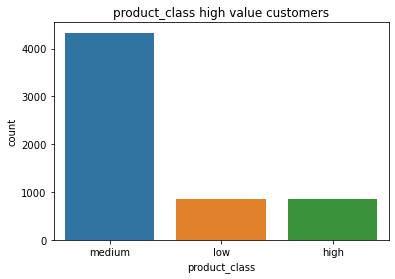

In [111]:
#pdt class high_value
sns.countplot(x=seg3_td['product_class'])
plt.title('product_class high value customers')

plt.savefig('pdt_class_hv.jpg')

In [112]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8


In [113]:
##CREATING A DAY_NAME FIELD FROM TRANSACTION DATE FIELD
seg3_td['day']=seg3_td['transaction_date'].dt.day_name()
seg3_td.head()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/3186861769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg3_td['day']=seg3_td['transaction_date'].dt.day_name()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month,day
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5,Sunday
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8,Thursday
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10,Sunday
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7,Saturday
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8,Wednesday


In [114]:
seg3_td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,value,month,day
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,5,Sunday
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,8,Thursday
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,10,Sunday
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,7,Saturday
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,8,Wednesday


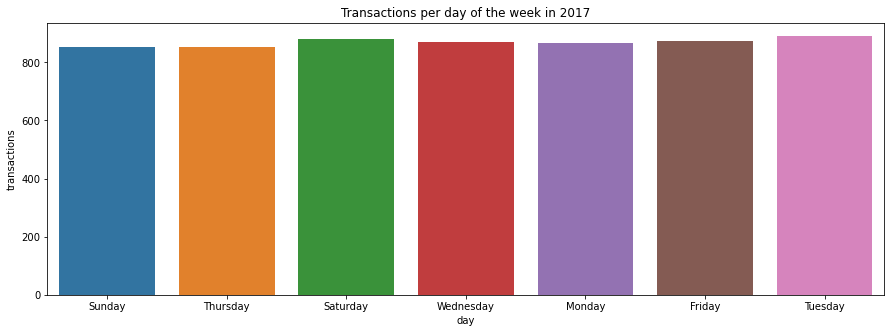

In [115]:
#transactions by day of the week for vip customers in 2017
plt.figure(figsize=(15,5))
sns.countplot(x=seg3_td['day'])
plt.ylabel('transactions')
plt.title('Transactions per day of the week in 2017')
plt.savefig('transation_per_day_hv.jpg')

In [116]:
seg3_td['day'].value_counts().sort_values()

Sunday       853
Thursday     854
Monday       867
Wednesday    871
Friday       874
Saturday     879
Tuesday      891
Name: day, dtype: int64

In [120]:
#NEW CUSTOMER DATA
nw=pd.read_excel(r'C:\Users\ERIA\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', skiprows=1, sheet_name='NewCustomerList')
nw.head()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_9240/3957221672.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  nw=pd.read_excel(r'C:\Users\ERIA\Downloads\KPMG_VI_New_raw_data_update_final.xlsx', skiprows=1, sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [121]:
nw['Year']=pd.DatetimeIndex(nw['DOB']).year
nw.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Year
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,1957.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,1970.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,1974.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,1979.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,1965.0


In [122]:
nw['AGE']=2018-nw['Year']
nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [123]:
nw.drop(columns=['first_name','last_name','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],inplace=True)
nw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  983 non-null    datetime64[ns]
 3   job_title                            894 non-null    object        
 4   job_industry_category                835 non-null    object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

In [124]:
nw.drop(columns=['Rank','Year'], inplace=True)

In [125]:
nw['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [126]:
nw['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


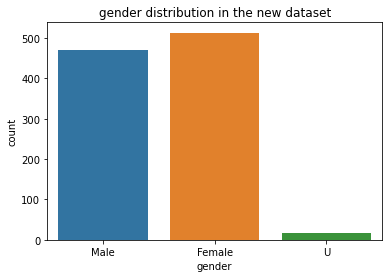

In [138]:
sns.countplot(nw['gender'])
plt.title('gender distribution in the new dataset')
plt.savefig('nw_gender.jpg')

In [127]:
nw['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


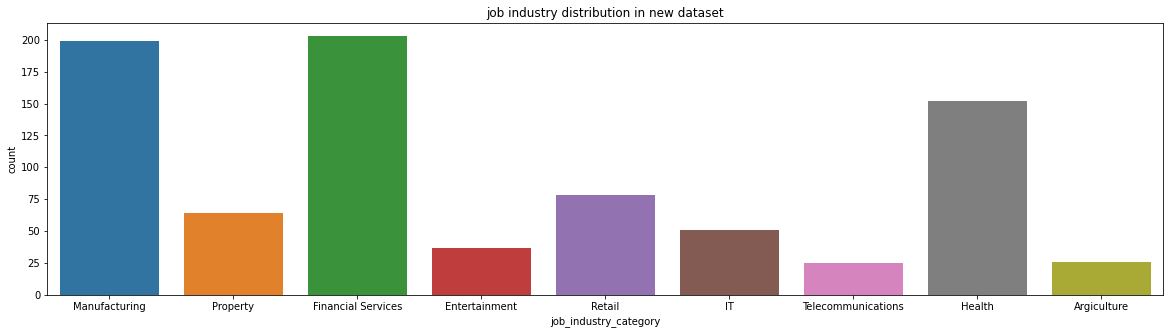

In [137]:
plt.figure(figsize=(20,5))
sns.countplot(nw['job_industry_category'])
plt.title('job industry distribution in new dataset')
plt.savefig('nw_industry.jpg')

In [128]:
#creating groups by binning
bins=np.linspace(min(nw['AGE']),max(nw['AGE']),5)
bins

array([16., 32., 48., 64., 80.])

In [129]:
group_names=['youths','middle age','seniors','elderly']
nw['Age_bin']=pd.cut(nw['AGE'],bins,labels=group_names,include_lowest=True)
nw['Age_bin'].value_counts() 

middle age    294
seniors       284
youths        228
elderly       177
Name: Age_bin, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


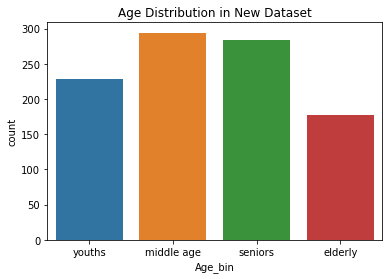

In [133]:
sns.countplot(nw['Age_bin'])
plt.title('Age Distribution in New Dataset')
plt.savefig('nw_Age.jpg')

In [130]:
nw['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


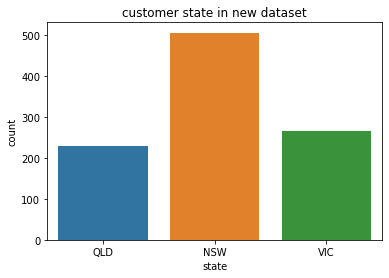

In [135]:
sns.countplot(nw['state'])
plt.title('customer state in new dataset')
plt.savefig('nw_states.jpg')

In [131]:
nw['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


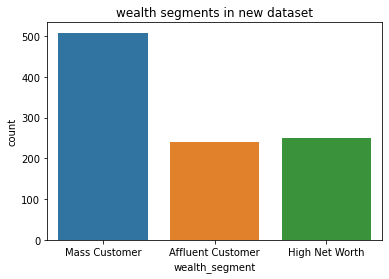

In [134]:
sns.countplot(nw['wealth_segment'])
plt.title('wealth segments in new dataset')
plt.savefig('nw_wealth_segment.jpg')

In [ ]:
#FINDINGS
#middle age (34-51) people are your biggest customer base followed by youths (16-33)
#females buy more than men
#mass customers are your biggest revenue source
#financial services, manufacturing and health are the top job industries with our high value clients
#....agriculture, IT and Telecom
#clients car ownership is ins't a big factor because the distribution of owners and non_owners is nearly the same 
#tenure value seems not to provide clear distinction of customer distribution in the data 
#customers with property_valuation 8-10 contribute alot to your revenue